# Mapping from `datascience` to Pandas

Welcome! This notebook serves as an introduction to working with Python's widely used Pandas library. The functions introduced will be analogous to those in Berkeley's `datascience` module, with examples provided for each.

We will cover the following topics in this notebook:
1. [Basics of Pandas](#basics)
    - [Importing and Loading Packages](#import)
<br>
<br>
2. [Dataframes: Working with Tabular Data](#dataframes)
    - [Creating a Dataframe](#creating)
    - [Accessing Values in Dataframe](#accessing)
    - [Manipulating Data](#manipulating)
<br>
<br>
3. [Visualizing Data](#visualizing)
    - [Histograms](#histograms)
    - [Line Plots](#line)
    - [Scatter Plots](#scatter)
    - [Bar Plots](#bar)

## 1. Basics <a id='basics'></a>

This notebook assumes familiarity with Python concepts, syntax and data structures at the level of Data 8. For a brief refresher on some Python concepts, refer to this [Python Basics Guide on Github](https://github.com/TiesdeKok/LearnPythonforResearch/blob/master/0_python_basics.ipynb)

Python has a great ecosystem of data-centric packages which makes it excellent for data analysis. Pandas is one of those packages, and makes importing and analyzing data much easier. Pandas builds on packages like NumPy and matplotlib to give us a single, convenient, place to do most of our data analysis and visualization work.

### 1.1 Importing and Loading Packages <a id='import'></a>

It is useful to import certain packages in our workspace for analysis and data visualization. But first, we may need to install these package if they are not present already. We do this via the command line as follows:

In [1]:
# run this cell to install packages
!pip install datascience
!pip install pandas
!pip install numpy

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Once we have installed the required packages, we do not need to reinstall them again when we start or reopen a Jupyter notebook. We can simply import them using the `import` keyword. Since we import Pandas as `pd`, we need to prefix all functions with `pd`, similar to how we prefix all numpy functions with `np` (such as `np.append()`).

In [2]:
# run this cell to import the following packages
from datascience import * # import the datascience package
import pandas as pd # import the pandas library. pd is a common shorthand for pandas
import numpy as np # import numpy for working with numbers

## 2. Dataframes: Working with Tabular Data <a id='dataframes'></a>

In Python's `datascience` module, we used `Table` to build our dataframes and used commands such as `select()`, `where()`, `group()`, `column()` etc. In this section, we will go over some basic commands to work with tabular data in Pandas

### 2.1 Creating a dataframe <a id='creating'> </a>

Pandas introduces a data structure (i.e. dataframe) that represents data as a table with columns and rows. 

In Python's `datascience` module that is used in Data 8, this is how we created tables from scratch by extending an empty table:

In [3]:
t = Table().with_columns([
     'letter', ['a', 'b', 'c', 'z'],
     'count',  [  9,   3,   3,   1],
     'points', [  1,   2,   2,  10],
 ])
t

letter,count,points
a,9,1
b,3,2
c,3,2
z,1,10


In Pandas, we can use the function `pd.DataFrame` to initialize a dataframe from a dictionary or a list-like object. Refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) for more information

In [4]:
# example: creating a dataframe from a dictionary
df_from_dict = pd.DataFrame({ 'letter' : ['a', 'b', 'c', 'z'],
                      'count' : [  9,   3,   3,   1],
                      'points' : [  1,   2,   2,  10]
                      })
df_from_dict

,count,letter,points
0,9,a,1
1,3,b,2
2,3,c,2
3,1,z,10


More often, we will need to create a dataframe by importing data from a .csv file. In `datascience`, this is how we read data from a csv:

In [5]:
datascience_baby = Table.read_table('baby.csv')
datascience_baby

Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
1,120,284,27,62,100,False
2,113,282,33,64,135,False
3,128,279,28,64,115,True
4,108,282,23,67,125,True
5,136,286,25,62,93,False
6,138,244,33,62,178,False
7,132,245,23,65,140,False
8,120,289,25,62,125,False
9,143,299,30,66,136,True
10,140,351,27,68,120,False


In Pandas, we use `pd.read.csv()` to read data from a csv file. Sometimes, we may need to specify the parameters `sep`, `header` or `encoding` as well. For a full list of parameters, refer to [this guide](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [6]:
# reading baby.csv (located in current working directory)
baby = pd.read_csv('baby.csv')
baby.head() # display first few rows of dataframe

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


In [7]:
# view summary of data
baby.describe()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


In [8]:
# example: loading csv from URL
sat = pd.read_csv('http://data8.org/textbook/notebooks/sat2014.csv')
sat.head()

,State,Participation Rate,Critical Reading,Math,Writing,Combined
0,North Dakota,2.3,612,620,584,1816
1,Illinois,4.6,599,616,587,1802
2,Iowa,3.1,605,611,578,1794
3,South Dakota,2.9,604,609,579,1792
4,Minnesota,5.9,598,610,578,1786


In [9]:
# view information about dataframe
print(sat.shape) # view dimensions (rows, cols)
print(sat.columns.values) # view column names

(51, 6)
['State' 'Participation Rate' 'Critical Reading' 'Math' 'Writing'
 'Combined']


### 2.2 Accessing Values in Dataframe <a id='accessing'> </a>

In `datascience`, we can use `column()` to access values in a particular column as follows:

In [55]:
# access column 'letter'. returns array
t.column('letter')

array(['a', 'b', 'c', 'z'], 
      dtype='<U1')

In Pandas, columns are also known as Series. We can access a Pandas series by using the square bracket notation.

In [56]:
# returns Series object
sat['State']

0             North Dakota
1                 Illinois
2                     Iowa
3             South Dakota
4                Minnesota
5                 Michigan
6                Wisconsin
7                 Missouri
8                  Wyoming
9                   Kansas
10                Kentucky
11                Nebraska
12                Colorado
13             Mississippi
14               Tennessee
15                Arkansas
16                Oklahoma
17                    Utah
18               Louisiana
19                    Ohio
20                 Montana
21                 Alabama
22              New Mexico
23           New Hampshire
24           Massachusetts
25                 Vermont
26                 Arizona
27                  Oregon
28                Virginia
29              New Jersey
30             Connecticut
31           West Virginia
32              Washington
33              California
34                  Alaska
35          North Carolina
36            Pennsylvania
3

If we want a numpy array of column values, we can call the method `values` on a Series object:

In [12]:
sat['State'].values

array(['North Dakota', 'Illinois', 'Iowa', 'South Dakota', 'Minnesota',
       'Michigan', 'Wisconsin', 'Missouri', 'Wyoming', 'Kansas',
       'Kentucky', 'Nebraska', 'Colorado', 'Mississippi', 'Tennessee',
       'Arkansas', 'Oklahoma', 'Utah', 'Louisiana', 'Ohio', 'Montana',
       'Alabama', 'New Mexico', 'New Hampshire', 'Massachusetts',
       'Vermont', 'Arizona', 'Oregon', 'Virginia', 'New Jersey',
       'Connecticut', 'West Virginia', 'Washington', 'California',
       'Alaska', 'North Carolina', 'Pennsylvania', 'Rhode Island',
       'Indiana', 'Maryland', 'New York', 'Hawaii', 'Nevada', 'Florida',
       'Georgia', 'South Carolina', 'Texas', 'Maine', 'Idaho', 'Delaware',
       'District of Columbia'], dtype=object)

In `datascience`, we used `take()` to access a row in the Table:

In [13]:
# selecting first two rows using Python's slicing notation
t.take[0:2]

letter,count,points
a,9,1
b,3,2


In Pandas, we can access rows and column by their position using the `iloc` method. We need to specify the rows and columns we want in the following syntax: `df.iloc[<rows>, <columns>]`. For more information on indexing, refer to [this guide](https://pandas.pydata.org/pandas-docs/stable/indexing.html)

In [14]:
# selecting first two rows using iloc
baby.iloc[0:2, :] 

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False


In [15]:
# specifying row indices
baby.iloc[[1, 4, 6], :]

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
1,2,113,282,33,64,135,False
4,5,136,286,25,62,93,False
6,7,132,245,23,65,140,False


We can also access a specific value in the dataframe by passing in the row and column indices:

In [16]:
# get value in second row, third column
baby.iloc[1, 2]

282

### 2.3 Manipulating Data <a id='manipulating'></a>

**Adding Columns**

Adding a new column in `datascience` is done by the `with_columns()` function as follows:

In [17]:
t.with_column('vowel', ['yes', 'no', 'no', 'no'])
t

letter,count,points
a,9,1
b,3,2
c,3,2
z,1,10


In Pandas, we can use the bracket notation and assign a list to add to the dataframe as follows:

In [18]:
# adding a new column
df_from_dict['newcol'] = [5, 6, 7, 8]
df_from_dict

,count,letter,points,newcol
0,9,a,1,5
1,3,b,2,6
2,3,c,2,7
3,1,z,10,8


We can also add an existing column to the new dataframe as a new column by performing an operation on it:

In [19]:
# Adding count * 2 to the dataframe
df_from_dict['doublecount'] = df_from_dict['count'] * 2
df_from_dict

,count,letter,points,newcol,doublecount
0,9,a,1,5,18
1,3,b,2,6,6
2,3,c,2,7,6
3,1,z,10,8,2


**Selecting Columns**

In `datascience`, we used `select()` to subset the dataframe by selecting columns:

In [20]:
t.select(['letter', 'points'])

letter,points
a,1
b,2
c,2
z,10


In Pandas, we use a double bracket notation to select columns. This returns a dataframe, unlike a Series object when we only use single bracket notation

In [21]:
# double bracket notation for new dataframe
df_from_dict[['count', 'doublecount']]

,count,doublecount
0,9,18
1,3,6
2,3,6
3,1,2


**Filtering Rows Conditionally**

In `datascience`, we used `where()` to select rows according to a given condition:

In [22]:
t.where('points', 2) # rows where points == 2

letter,count,points
b,3,2
c,3,2


In [23]:
t.where(t['count'] < 8) # rows where count < 8

letter,count,points
b,3,2
c,3,2
z,1,10


In Pandas, we can use the bracket notation to subset the dataframe based on a condition. We first specify a condition and then subset using the bracket notation:

In [24]:
# array of booleans
baby['Maternal.Smoker'] == True

0       False
1       False
2        True
3        True
4       False
5       False
6       False
7       False
8        True
9       False
10       True
11       True
12       True
13      False
14      False
15       True
16       True
17      False
18       True
19      False
20       True
21      False
22      False
23      False
24       True
25      False
26       True
27      False
28       True
29      False
        ...  
1144    False
1145     True
1146     True
1147     True
1148    False
1149     True
1150     True
1151    False
1152    False
1153    False
1154    False
1155    False
1156     True
1157    False
1158    False
1159     True
1160     True
1161     True
1162     True
1163     True
1164     True
1165     True
1166    False
1167    False
1168    False
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal.Smoker, Length: 1174, dtype: bool

In [25]:
# filter rows by condition Maternal.Smoker == True
baby[baby['Maternal.Smoker'] == True]

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
8,9,143,299,30,66,136,True
10,11,144,282,32,64,124,True
11,12,141,279,23,63,128,True
12,13,110,281,36,61,99,True
15,16,92,255,25,65,125,True
16,17,115,261,33,60,125,True
18,19,119,288,43,66,142,True
20,21,115,274,27,67,175,True


In [26]:
# filtering with multiple conditions
df_from_dict[(df_from_dict['count'] < 8) & (df_from_dict['points'] > 5)]

,count,letter,points,newcol,doublecount
3,1,z,10,8,2


**Renaming Columns**

In `datascience`, we used `relabeled()` to rename columns:

In [27]:
# rename 'points' to 'other name'
t.relabeled('points', 'other name')

letter,count,other name
a,9,1
b,3,2
c,3,2
z,1,10


Pandas uses `rename()`, which has an `index` parameter that needs to be set to `str` and a `columns` parameter that needs to be set to a dictionary of the names to be replaced with their replacements:

In [28]:
# rename 'points' to 'other name'
df_from_dict.rename(index = str, columns = {"points" : "other name"})

,count,letter,other name,newcol,doublecount
0,9,a,1,5,18
1,3,b,2,6,6
2,3,c,2,7,6
3,1,z,10,8,2


**Sorting Dataframe by Column**

In `datascience` we used `sort()` to sort a Table according to the values in a column:

In [29]:
# sort by count
t.sort('count')

letter,count,points
z,1,10
b,3,2
c,3,2
a,9,1


In Pandas, we use the `sort_values()` to sort by column. We need the `by` parameter to specify the row we want to sort by and the optional parameter `ascending = False` if we want to sort in descending order:

In [30]:
# sort by count, descending
df_from_dict.sort_values(by = ['count'], ascending = False)

,count,letter,points,newcol,doublecount
0,9,a,1,5,18
1,3,b,2,6,6
2,3,c,2,7,6
3,1,z,10,8,2


**Grouping and Aggregating**

In `datascience`, we used `group()` and the `collect` argument to group a Table by a column and aggregrate values in another column:

In [31]:
# group by count and aggregate by sum
t.select(['count', 'points']).group('count', collect=sum)

count,points sum
1,10
3,4
9,1


In Pandas, we use `groupby()` to group the dataframe. This function returns a groupby object, on which we can then call an aggregation function to return a dataframe with aggregated values for other columns. For more information, refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [32]:
# selecting two columns for brevity
df_subset = df_from_dict[['count', 'points']]
df_subset

,count,points
0,9,1
1,3,2
2,3,2
3,1,10


In [33]:
count_sums_df = df_subset.groupby(['count']).sum()
count_sums_df

,points
count,
1,10
3,4
9,1


**Pivot Tables**

In `datascience`, we used the `pivot()` function to build contingency tables:

In [34]:
# creating new Table
cones_tbl = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)

cones_tbl

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [35]:
# pivoting on color and flavor
cones_tbl.pivot("Flavor", "Color")

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


We can also pass in the parameters `values` to specify the values in the table and `collect` to specify the aggregration function.

In [36]:
# setting parameters values and collect
cones_tbl.pivot("Flavor", "Color", values = "Price", collect = np.sum)

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


In Pandas, we use `pd.pivot_table()` to create a contingency table. The argument `columns` is similar to the first argument in `datascience`'s `pivot` function and sets the column names of the pivot table. The argument `index` is similar to the second argument in `datascience`'s `pivot` function and sets the first column of the pivot table or the keys to group on. For more information, refer to the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)

In [37]:
# creating new dataframe
cones_df = pd.DataFrame({"Flavor" : ['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'],
                         "Color" : ['pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'],
                         "Price" : [3.55, 4.75, 5.25, 5.25, 5.25, 4.75]})
cones_df

,Color,Flavor,Price
0,pink,strawberry,3.55
1,light brown,chocolate,4.75
2,dark brown,chocolate,5.25
3,pink,strawberry,5.25
4,dark brown,chocolate,5.25
5,pink,bubblegum,4.75


In [38]:
# creating the pivot table
pd.pivot_table(cones_df, columns = ["Flavor"], index = ["Color"])

Price                     
Flavor      bubblegum chocolate strawberry
Color                                     
dark brown        NaN      5.25        NaN
light brown       NaN      4.75        NaN
pink             4.75       NaN        4.4

If there is no data in the groups, then Pandas will output `NaN` values. 

We can also specify the parameters like `values` (equivalent to `values` in `datascience`'s `pivot`) and `aggfunc` (equivalent to `collect` in `datascience`'s `pivot`)

In [39]:
# additional arguments
pd.pivot_table(cones_df, columns = ["Flavor"], index = ["Color"], values = "Price", aggfunc=np.sum)

Flavor,bubblegum,chocolate,strawberry
Color,,,
dark brown,NaN,10.50,NaN
light brown,NaN,4.75,NaN
pink,4.75,NaN,8.8


**Joining/Merging**

In `datascience`, we used `join()` to join two tables based on shared values in columns. We specify the column name in the first table to match on, the name of the second table and the column name in the second table to match on.

In [40]:
# creating new table
ratings_tbl = Table().with_columns(
    'Kind', make_array('strawberry', 'chocolate', 'vanilla'),
    'Stars', make_array(2.5, 3.5, 4)
)
ratings_tbl

Kind,Stars
strawberry,2.5
chocolate,3.5
vanilla,4


In [41]:
# joining cones and ratings
cones_tbl.join("Flavor", ratings_tbl, "Kind")

Flavor,Color,Price,Stars
chocolate,light brown,4.75,3.5
chocolate,dark brown,5.25,3.5
chocolate,dark brown,5.25,3.5
strawberry,pink,3.55,2.5
strawberry,pink,5.25,2.5


In Pandas, we can use the `merge()` function to join two tables together. The first parameter is the name of the second table to join on. The parameters `left_on` and `right_on` specify the columns to use in the left and right tables respectively. There are more parameters such as `how` which specify what kind of join to perform (Inner (Default), Outer, Left, Right). For more information, refer to this [Kaggle Tutorial](https://www.kaggle.com/crawford/python-merge-tutorial/notebook)

In [42]:
# creating new ratings df
ratings_df = pd.DataFrame({"Kind" : ['strawberry', 'chocolate', 'vanilla'],
                           "Stars" : [2.5, 3.5, 4]})
ratings_df

,Kind,Stars
0,strawberry,2.5
1,chocolate,3.5
2,vanilla,4.0


In [43]:
# merging cones and ratings
cones_df.merge(ratings_df, left_on = "Flavor", right_on = "Kind")

,Color,Flavor,Price,Kind,Stars
0,pink,strawberry,3.55,strawberry,2.5
1,pink,strawberry,5.25,strawberry,2.5
2,light brown,chocolate,4.75,chocolate,3.5
3,dark brown,chocolate,5.25,chocolate,3.5
4,dark brown,chocolate,5.25,chocolate,3.5


## 3. Visualizing Data <a id='visualizing'> </a>

In `datascience`, we learned to plot data using histograms, line plots, scatter plots and histograms. The corresponding functions were `hist()`, `plot()`, `scatter()` and `barh()`. Plotting methods in Pandas are nearly identical to `datascience` since both build on the library `matplotlib`

In this section we will go through examples of such plots in Pandas

<a id='histograms'></a>**3.1 Histograms**

In `datascience`, we used `hist()` to create a histogram. In this example, we will be using data from `baby.csv`. Recall that the baby data set contains data on a random sample of 1,174 mothers and their newborn babies. The column `birthwt` contains the birth weight of the baby, in ounces; `gest_days` is the number of gestational days, that is, the number of days the baby was in the womb. There is also data on maternal age, maternal height, maternal pregnancy weight, and whether or not the mother was a smoker.

In [44]:
# importing matplotlib for plotting
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline

In [45]:
# reading in the data
datascience_baby = Table.read_table('baby.csv')
datascience_baby

Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
1,120,284,27,62,100,False
2,113,282,33,64,135,False
3,128,279,28,64,115,True
4,108,282,23,67,125,True
5,136,286,25,62,93,False
6,138,244,33,62,178,False
7,132,245,23,65,140,False
8,120,289,25,62,125,False
9,143,299,30,66,136,True
10,140,351,27,68,120,False


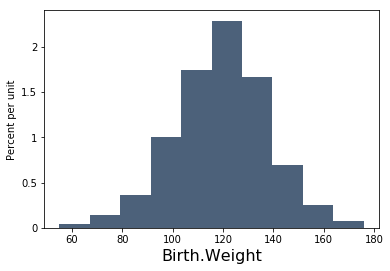

In [46]:
# creating a histogram
datascience_baby.hist('Birth.Weight')

In Pandas, we use `hist()` to create histograms, just like `datascience`. Refer to the [documentation](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.hist.html) for a full list of parameters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110a37c88>]], dtype=object)

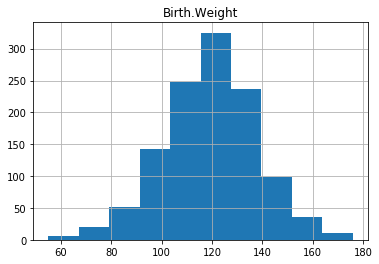

In [47]:
# creating a histogram
baby.hist('Birth.Weight')

<a id='line'></a>**3.2 Line Plots**

In `datascience`, we used `plot()` to create a line plot of numerical values. In this example, we will be using census data and plot variables such as Age in a line plot

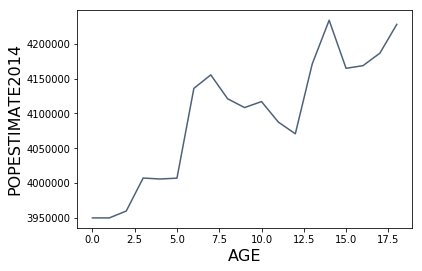

In [48]:
# line plot in datascience
census_tbl = Table.read_table("https://raw.githubusercontent.com/data-8/materials-x18/master/lec/x18/1/census.csv").select(['SEX', 'AGE', 'POPESTIMATE2014'])
children_tbl = census_tbl.where('SEX', are.equal_to(0)).where('AGE', are.below(19)).drop('SEX')
children_tbl.plot('AGE')

In Pandas, we can use `plot.line()` to create line plots. For a full list of parameters, refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.line.html)

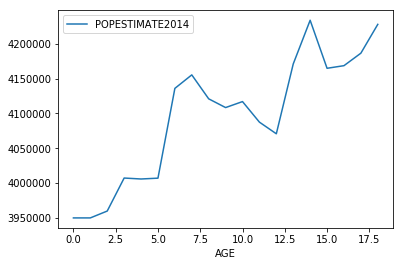

In [49]:
#Pandas
census_df = pd.read_csv("https://raw.githubusercontent.com/data-8/materials-x18/master/lec/x18/1/census.csv")[["SEX", "AGE", "POPESTIMATE2014"]]
children_df = census_df[(census_df.SEX == 0) & (census_df.AGE < 19)].drop("SEX", axis=1)
children_df.plot.line(x="AGE", y="POPESTIMATE2014")

<a id='scatter'></a>**3.3 Scatter Plots**

In `datascience`, we used `scatter()` to create a scatter plot of two numerical columns

In [50]:
football_tbl = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/deflategate.csv')
football_tbl

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


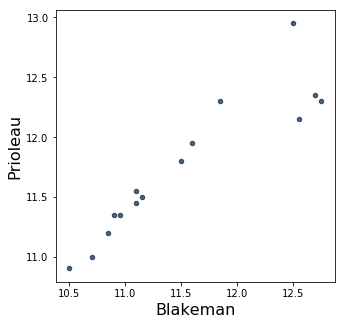

In [51]:
football_tbl.scatter('Blakeman', 'Prioleau')

In Pandas, we use `plot.scatter()` to create a scatter plot. For a full list of parameters, refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.scatter.html)

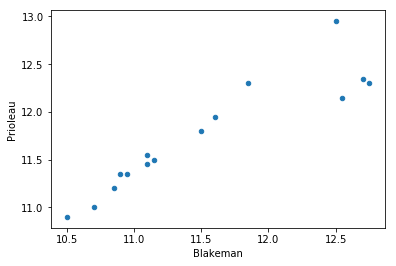

In [52]:
football_df = pd.read_csv('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/deflategate.csv')
football_df.plot.scatter(x="Blakeman", y="Prioleau")

<a id='bar'></a>**3.4 Bar Plots**

In `datascience`, we used `barh()` to create a horizontal bar plot

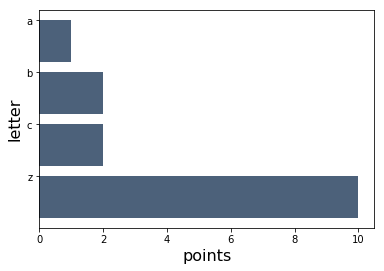

In [53]:
t.barh("letter", "points")

In Pandas, we use `plot.barh()` to create a bar chart. For a full list of parameters, refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.barh.html)

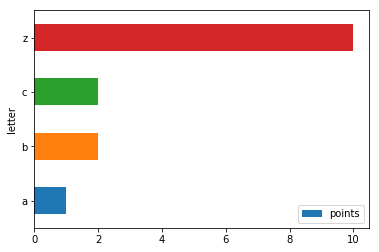

In [54]:
df_from_dict.plot.barh(x='letter', y='points')

---

## Further Reading

Here is a list of useful Pandas resources:

- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [Dataquest Pandas Tutorial](https://www.dataquest.io/blog/pandas-python-tutorial/)
- [Pandas Cookbook](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/)